## Model comparinson

Define hypothesis about which combination would work best. Evaluate hypothesis with this code.

In [ ]:
import torch
import tensorflow as tf
%load_ext autoreload

# enable GPU
device = "mps" if torch.backends.mps.is_available() else "cpu"
x = torch.rand(size=(3, 4)).to(device)

gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 1:
    tf.config.set_visible_devices(gpus[1], 'GPU')
    print("Nutze GPU:", gpus[1])

In [4]:
# %reload_ext autoreload
# %load_ext autoreload
%autoreload 2
from data_loader import load_image_data
import config

X_train, X_val, y_train, y_val, label_map = load_image_data(
    csv_file=config.CSV_FILE,
    img_size=(299, 299),
    images_per_label=20,
    validation_split=0.2
)

In [5]:
# %load_ext autoreload
%autoreload 2
from model_benchmark import evaluate_models

results = evaluate_models(
    csv_path=config.CSV_FILE,
    img_size=(299, 299),
    epochs=10
)


/Users/fionanueesch/Documents/PERS/CAS Machine Inelligence/M3 Deep Learning/Project/DockerDeepLearning/src/model_benchmark.py:102: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = bmodel(weights='imagenet', include_top=False, input_shape=img_size + (3,))
2025-06-09 19:47:40.757707: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-06-09 19:47:40.757737: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-06-09 19:47:40.757739: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2025-06-09 19:47:40.757749: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-09 19:47:40.757758: I tensorflow/core/common_runtime/pluggable_device/

Training MobileNetV2 with head simple...


2025-06-09 19:47:42.185061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Evaluating MobileNetV2 with head simple...
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
Training MobileNetV2 with head dense_dropout...
Evaluating MobileNetV2 with head dense_dropout...
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
Training MobileNetV2 with head batchnorm_dropout...
Evaluating MobileNetV2 with head batchnorm_dropout...
1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x6059e8550> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and h

,backbone,head,accuracy,f1_score,end_val_loss,loss,val_loss,y_true,y_pred,label_map
1,MobileNetV2,dense_dropout,0.683333,0.683573,1.006383,"[3.5486440658569336, 3.1294400691986084, 2.692...","[2.2918295860290527, 1.783518671989441, 1.6181...","[0, 6, 9, 1, 2, 2, 12, 7, 4, 3, 12, 7, 11, 6, ...","[0, 5, 9, 1, 3, 2, 8, 7, 4, 6, 12, 7, 10, 10, ...","{'Pepper__bell___Bacterial_spot': 0, 'Pepper__..."
2,MobileNetV2,batchnorm_dropout,0.683333,0.681746,1.373566,"[2.8951194286346436, 0.8769899010658264, 0.480...","[2.364307165145874, 2.0370256900787354, 1.8476...","[0, 6, 9, 1, 2, 2, 12, 7, 4, 3, 12, 7, 11, 6, ...","[6, 5, 9, 1, 2, 2, 8, 7, 3, 5, 12, 6, 10, 6, 2...","{'Pepper__bell___Bacterial_spot': 0, 'Pepper__..."
0,MobileNetV2,simple,0.650000,0.633333,1.199641,"[2.8008878231048584, 2.138343095779419, 1.6528...","[2.520214319229126, 2.1163413524627686, 1.8617...","[0, 6, 9, 1, 2, 2, 12, 7, 4, 3, 12, 7, 11, 6, ...","[0, 7, 9, 1, 3, 2, 8, 7, 4, 3, 12, 7, 10, 9, 2...","{'Pepper__bell___Bacterial_spot': 0, 'Pepper__..."
3,MobileNetV2,conv,0.583333,0.555945,6.802392,"[9.4645414352417, 3.704143524169922, 3.3979759...","[3.5012543201446533, 2.411379098892212, 2.7539...","[0, 6, 9, 1, 2, 2, 12, 7, 4, 3, 12, 7, 11, 6, ...","[0, 3, 9, 1, 3, 7, 10, 7, 4, 3, 12, 8, 14, 12,...","{'Pepper__bell___Bacterial_spot': 0, 'Pepper__..."


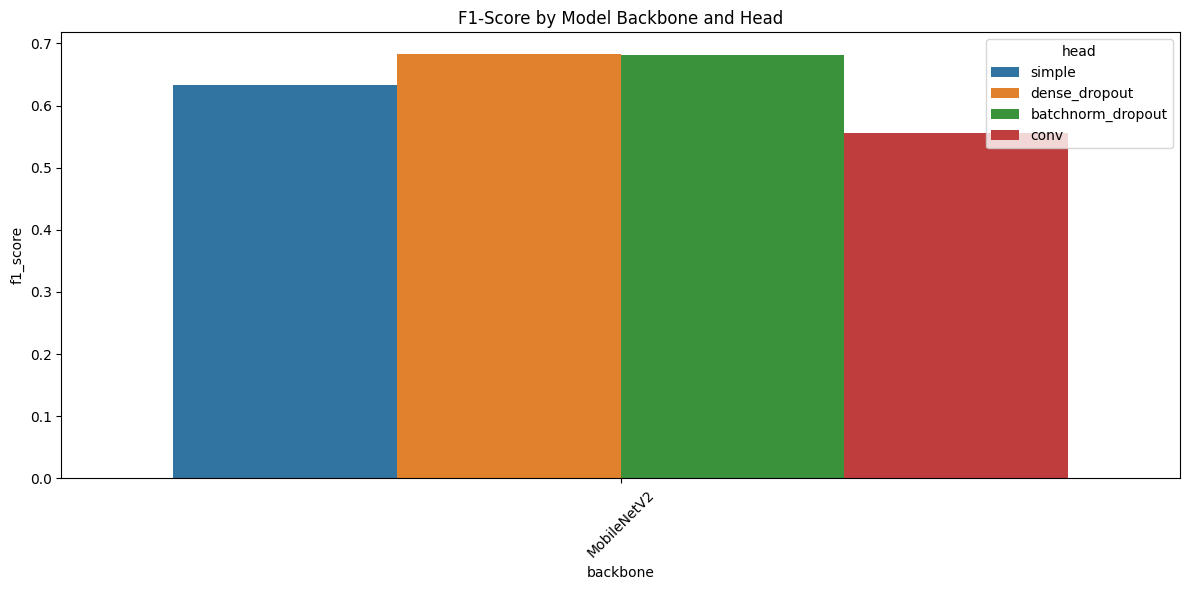

Model: MobileNetV2 + simple, F1-Score: 63.33%, Accuracy: 65.00%, Final Val_loss: 119.96%


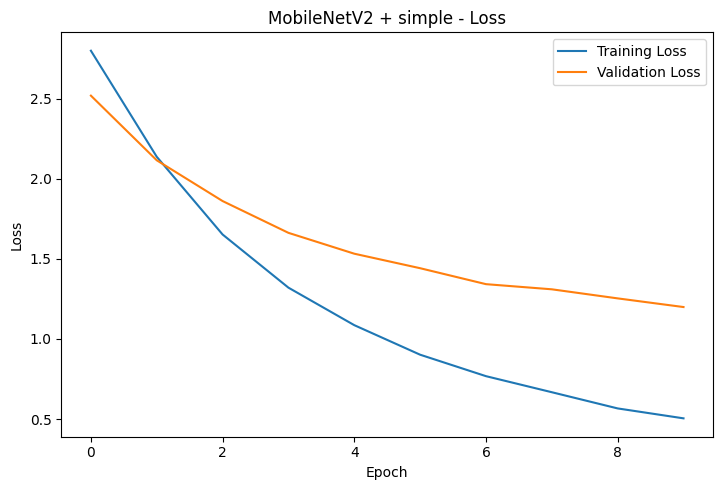

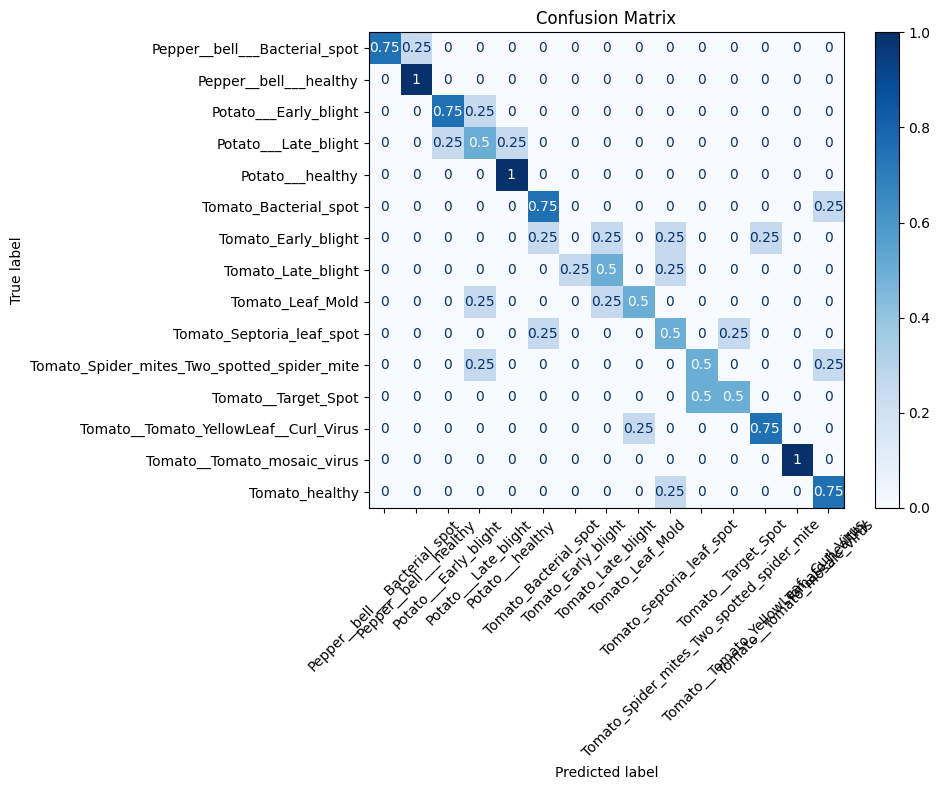

Model: MobileNetV2 + dense_dropout, F1-Score: 68.36%, Accuracy: 68.33%, Final Val_loss: 100.64%


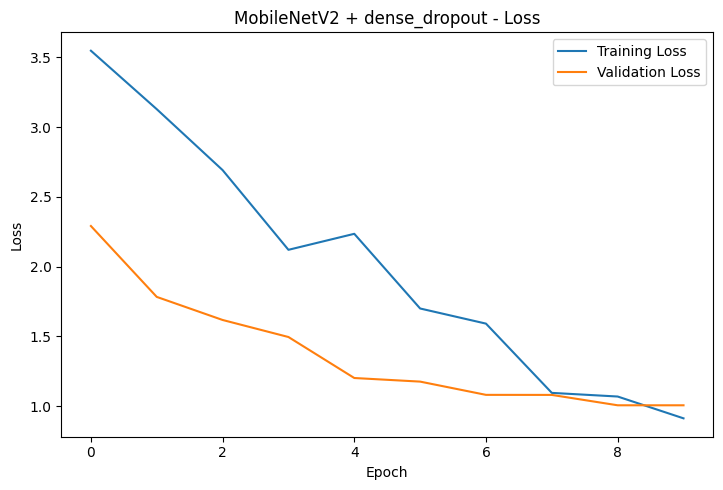

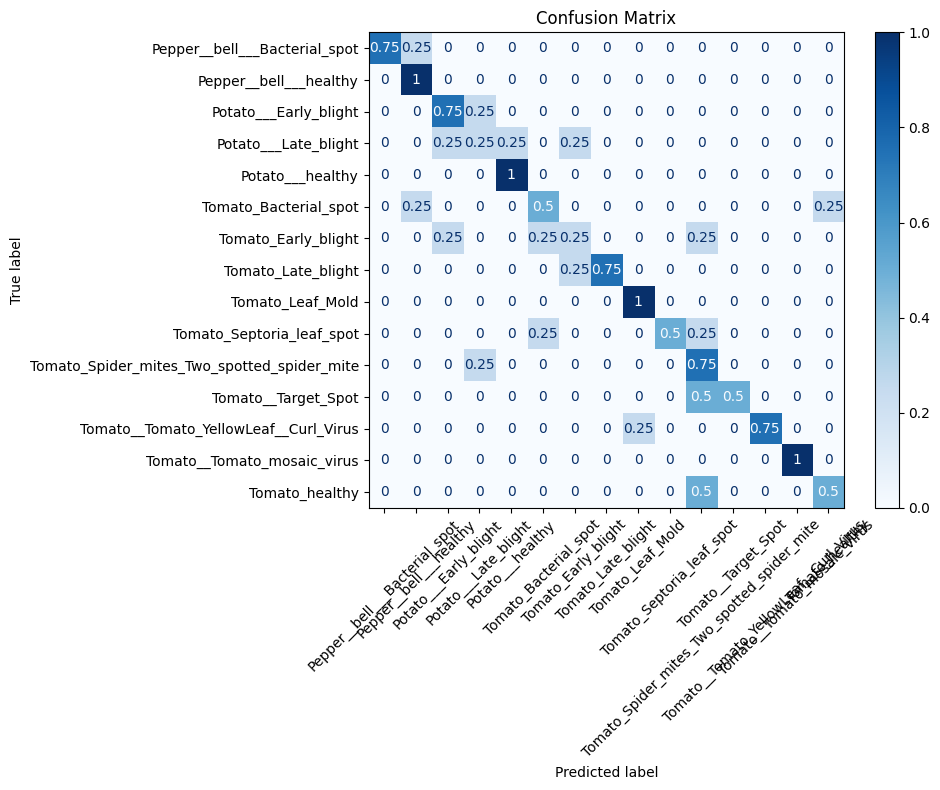

Model: MobileNetV2 + batchnorm_dropout, F1-Score: 68.17%, Accuracy: 68.33%, Final Val_loss: 137.36%


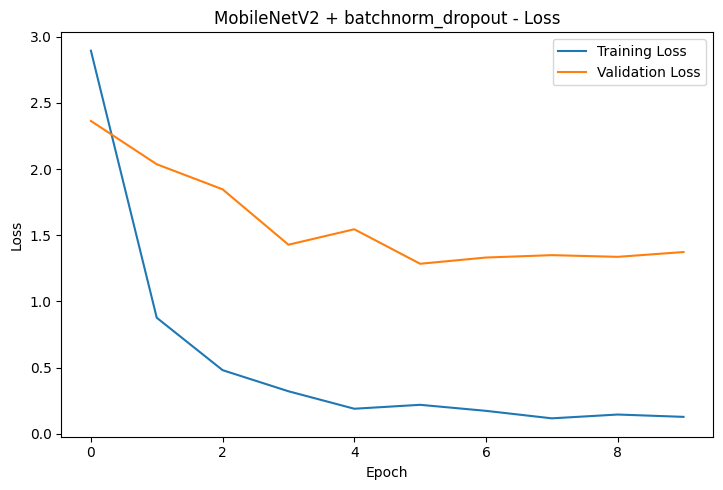

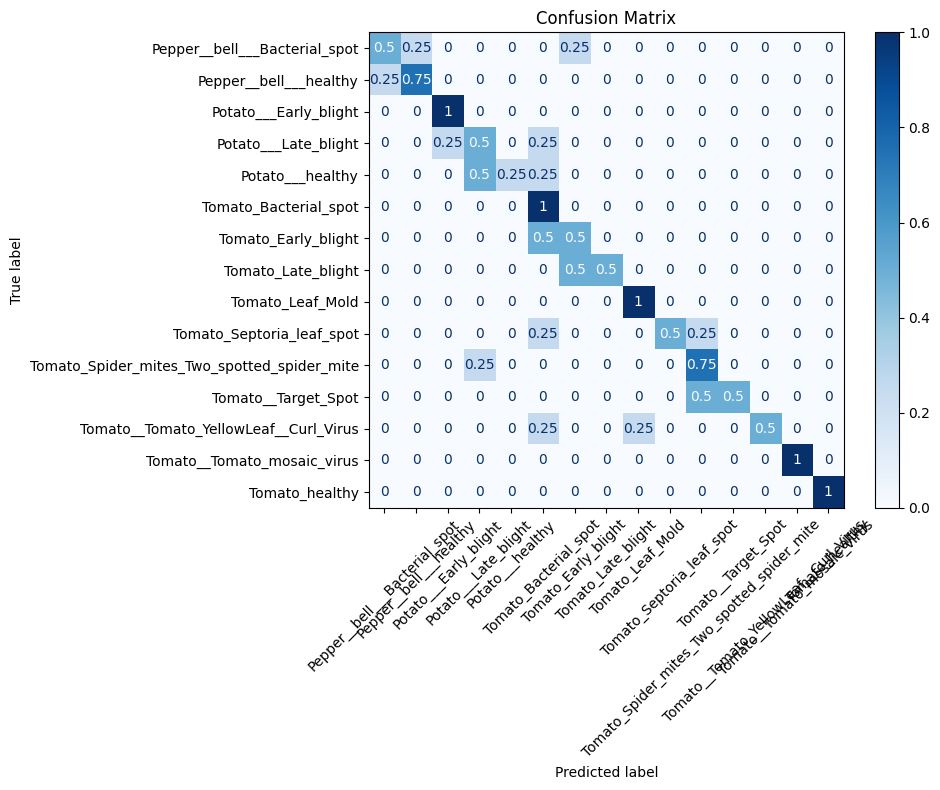

Model: MobileNetV2 + conv, F1-Score: 55.59%, Accuracy: 58.33%, Final Val_loss: 680.24%


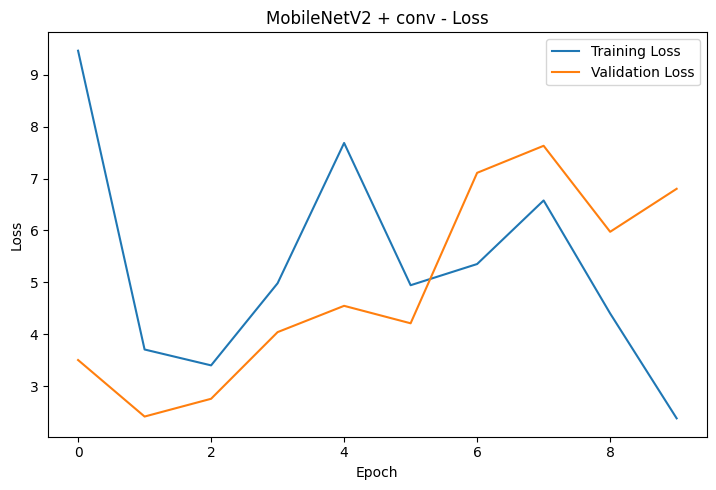

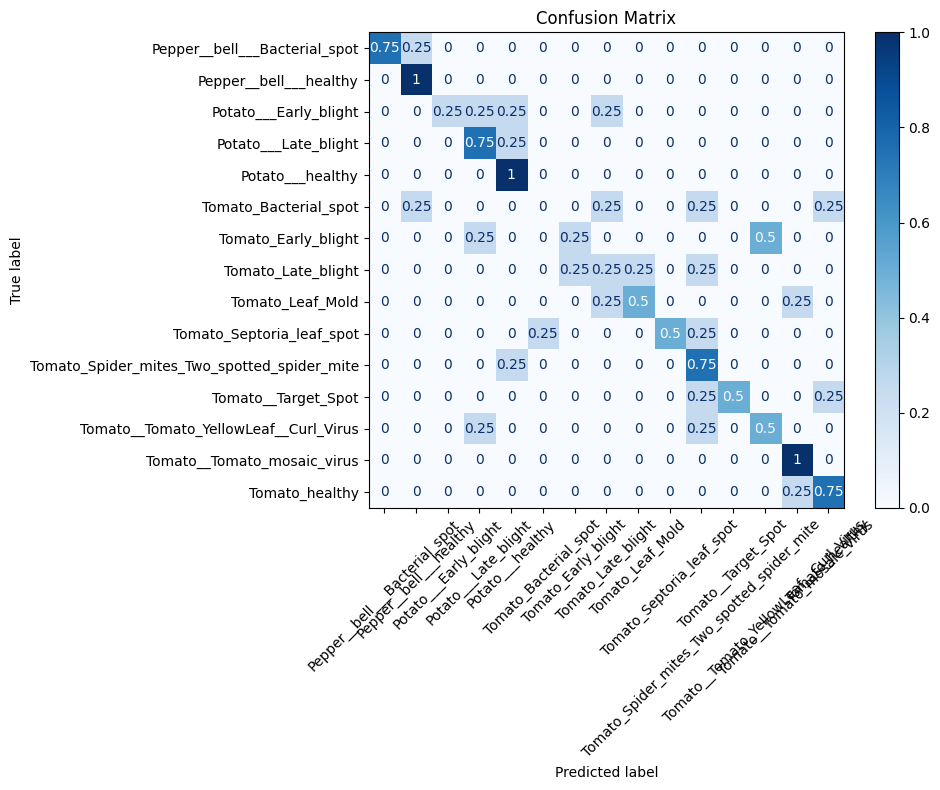

In [6]:
# %load_ext autoreload
%autoreload 2

# Display results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from visualization_tools import plot_loss_curves, plot_conf_matrix

# print(results)
results.style.format({"accuracy": "{:.2%}", "f1_score": "{:.2%}"})

top_results = results.sort_values(by="f1_score", ascending=False)
display(top_results)

plt.figure(figsize=(12, 6))
sns.barplot(data=results, x="backbone", y="f1_score", hue="head")
plt.title("F1-Score by Model Backbone and Head")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


for result in results.itertuples():
    print(f"Model: {result.backbone} + {result.head}, F1-Score: {result.f1_score:.2%}, Accuracy: {result.accuracy:.2%}, Final Val_loss: {result.end_val_loss:.2%}")
    # Plot accuracy and loss
    plot_loss_curves(result.loss, result.val_loss, model_name= f"{result.backbone} + {result.head}")

    # Plot confusion matrix
    plot_conf_matrix(
        y_true=result.y_true,
        y_pred=result.y_pred,
        class_names=list(result.label_map.keys()),
        normalize='true'
    )